In [0]:
%tensorflow_version 2.x

In [0]:
# 1. keras -> tensorflow.keras
from tensorflow.keras.datasets.mnist import load_data
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = load_data()

In [43]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [44]:
import pandas as pd
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


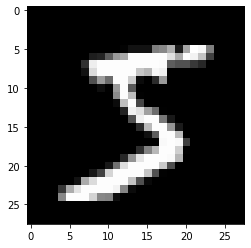

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[0], cmap="gray")

In [46]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
mlp = Sequential()
mlp.add(Dense(128, activation="relu", input_dim=784))
mlp.add(Dense(10, activation="softmax"))
mlp.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
from tensorflow.keras.losses import CategoricalCrossentropy
# 最後一層個數
# 1:"binary_crossentropy" 2up:"categorical_crossentropy"
# 激活函數
# 1:"sigmoid" 2up:"softmax"
mlp.compile(loss=CategoricalCrossentropy(),
            optimizer="adam",
            metrics=["accuracy"])

In [48]:
# mlp: 進去要1D, tensorflow: 輸入[-1, 1][0, 1]
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255
pd.DataFrame(x_train_norm)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.576471,0.988235,0.164706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
# 答案要做one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print(y_train[0], y_train_cat[0])

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [50]:
# batch_size: 問多少筆資料進行一次梯度下降(平均)
# epochs: 整份資料要看幾遍
# validation_split: train_test_split驗證模型到底好不好
# verbose: log level(0:沒有 1:最多 2:適中)
# 270: 54000(train) / 200
mlp.fit(x_train_norm, 
        y_train_cat,
        batch_size=200,
        epochs=15,
        validation_split=0.1,
        verbose=2)

Epoch 1/15
270/270 - 1s - loss: 0.4340 - accuracy: 0.8797 - val_loss: 0.1931 - val_accuracy: 0.9493
Epoch 2/15
270/270 - 1s - loss: 0.2029 - accuracy: 0.9419 - val_loss: 0.1406 - val_accuracy: 0.9615
Epoch 3/15
270/270 - 1s - loss: 0.1505 - accuracy: 0.9575 - val_loss: 0.1220 - val_accuracy: 0.9648
Epoch 4/15
270/270 - 1s - loss: 0.1199 - accuracy: 0.9657 - val_loss: 0.1058 - val_accuracy: 0.9700
Epoch 5/15
270/270 - 1s - loss: 0.0976 - accuracy: 0.9721 - val_loss: 0.0935 - val_accuracy: 0.9732
Epoch 6/15
270/270 - 1s - loss: 0.0818 - accuracy: 0.9766 - val_loss: 0.0855 - val_accuracy: 0.9763
Epoch 7/15
270/270 - 1s - loss: 0.0689 - accuracy: 0.9801 - val_loss: 0.0832 - val_accuracy: 0.9743
Epoch 8/15
270/270 - 1s - loss: 0.0585 - accuracy: 0.9832 - val_loss: 0.0774 - val_accuracy: 0.9773
Epoch 9/15
270/270 - 1s - loss: 0.0507 - accuracy: 0.9860 - val_loss: 0.0786 - val_accuracy: 0.9770
Epoch 10/15
270/270 - 1s - loss: 0.0437 - accuracy: 0.9881 - val_loss: 0.0770 - val_accuracy: 0.9778

In [53]:
# predict: 機率 predict_classes: 類別
pre = mlp.predict_classes(x_test_norm)
pre

array([7, 2, 1, ..., 4, 5, 6])

In [54]:
mlp.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.0733 - accuracy: 0.9781


[0.07330738008022308, 0.9781000018119812]

In [60]:
import numpy as np
from sklearn.metrics import confusion_matrix
c = ["{}(預測)".format(i) for i in range(10)]
i = ["{}(正確)".format(i) for i in range(10)]
mat = confusion_matrix(y_test, pre)
mat = [np.round(row/sum(row), 3) for row in mat]
pd.DataFrame(mat, columns=c, index=i)

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(正確),0.986,0.000,0.001,0.000,0.002,0.001,0.004,0.001,0.003,0.002
1(正確),0.000,0.993,0.003,0.000,0.000,0.001,0.002,0.000,0.002,0.000
2(正確),0.003,0.001,0.975,0.002,0.002,0.000,0.004,0.004,0.009,0.001
3(正確),0.000,0.000,0.005,0.976,0.001,0.003,0.001,0.002,0.008,0.004
4(正確),0.000,0.000,0.001,0.001,0.980,0.000,0.007,0.001,0.001,0.009
5(正確),0.002,0.001,0.000,0.012,0.001,0.964,0.008,0.000,0.007,0.004
6(正確),0.003,0.002,0.001,0.001,0.003,0.001,0.987,0.001,0.000,0.000
7(正確),0.001,0.005,0.008,0.003,0.001,0.000,0.000,0.974,0.002,0.007
8(正確),0.003,0.000,0.002,0.003,0.003,0.002,0.002,0.003,0.979,0.002
9(正確),0.003,0.004,0.000,0.007,0.008,0.002,0.001,0.007,0.004,0.964


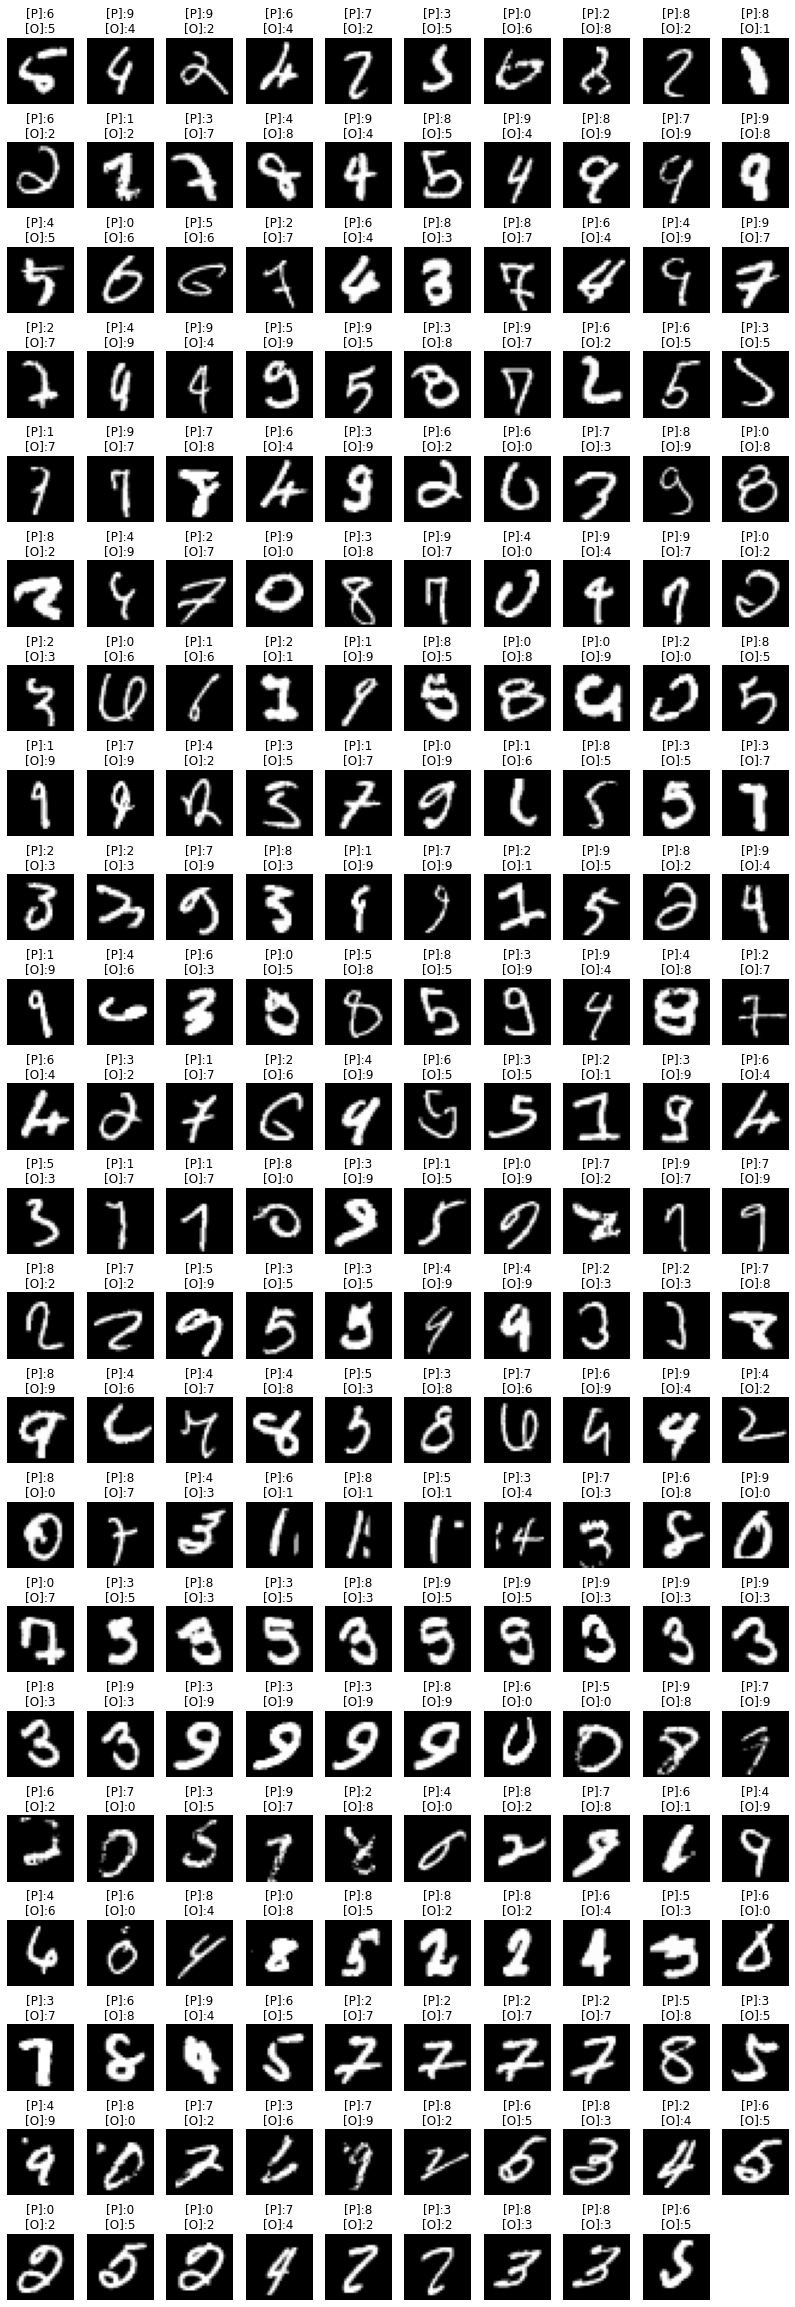

In [67]:
idx = np.nonzero(pre != y_test)[0]
false_pre_img = x_test[idx]
false_pre_label = y_test[idx]
false_pre_predict = pre[idx]

width = 10
height = len(idx) // width + 1
plt.figure(figsize=(14, 42))
for i, img in enumerate(false_pre_img):
    plt.subplot(height, width, i+1)
    t = "[P]:{}\n[O]:{}".format(false_pre_predict[i],
                                false_pre_label[i])
    plt.title(t)
    plt.axis("off")
    plt.imshow(img, cmap="gray")

檔名:test3.png
正確答案應該是: 7


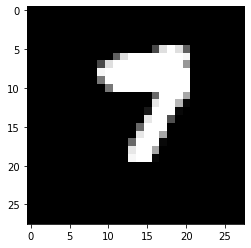

In [77]:
from tensorflow.keras.preprocessing.image import load_img
f = input("檔名:")
img_raw = load_img(f, target_size=(28, 28)).convert("L")
img = np.array(img_raw).reshape(1, 784) / 255
answer = mlp.predict_classes(img)[0]
print("正確答案應該是:", answer)
plt.imshow(img_raw, cmap="gray")